# **MODELISATION-HACKATHON**

In [13]:
import pandas as pd
df = pd.read_csv("/content/dataset-modelisation-hackathon-vf.csv")
df.head()

,Créatinine (mg/L),Urée (g/L),Age,Na^+ (meq/L),TA (mmHg)/Systole,Choc de Pointe/Perçu,Sexe,Anémie,Score de Glasgow (/15),Stage de l'IRC,Enquête Sociale/Tabac,Enquête Sociale/Alcool
0,42.0,1.14,68,142.0,130.0,0.0,1.0,1.0,15.000000,5,0.0,1.0
1,156.0,1.58,58,130.0,150.0,0.0,1.0,1.0,15.000000,5,0.0,1.0
2,379.0,3.03,42,141.0,169.0,0.0,0.0,1.0,14.237314,5,0.0,0.0
3,93.0,2.13,55,123.0,110.0,0.0,0.0,1.0,14.240324,5,0.0,0.0
4,355.9,3.22,38,138.6,164.0,0.0,1.0,1.0,14.296328,5,0.0,0.0


In [14]:
df.shape

(276, 12)

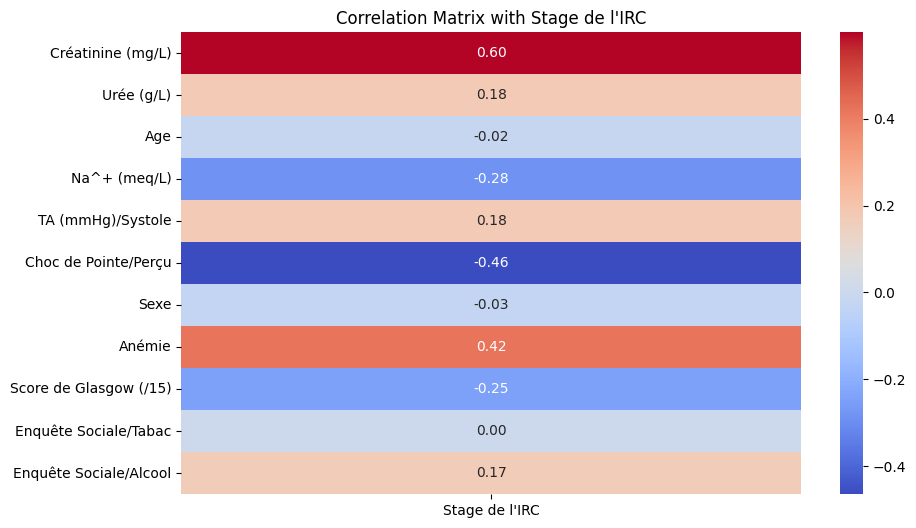

In [2]:
# prompt: Matrice de correlation avec la variable cible "Stage de l'IRC"

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation matrix for the target variable "Stage de l'IRC"
target_variable = "Stage de l'IRC"
target_correlations = correlation_matrix[target_variable].drop(target_variable)

# Create a heatmap of the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Matrix with {target_variable}")
plt.show()


In [3]:
variable_cat_binaire = ['Sexe', 'Anémie', 'Enquête Sociale/Tabac', 'Enquête Sociale/Alcool']
variable_cat_non_binaire = ["Stage de l'IRC"]
variable_numérique = ['Créatinine (mg/L)',
                      'Urée (g/L)',
                      'Age',
                      'Na^+ (meq/L)',
                      'TA (mmHg)/Systole',
                      'Choc de Pointe/Perçu',
                      'Score de Glasgow (/15)']

In [4]:
# prompt: Encodage à chaud des variable binaire qui sont dans variable_cat_binaire

import pandas as pd
# One-hot encode binary categorical variables
df = pd.get_dummies(df, columns=variable_cat_binaire, drop_first=True)


In [5]:
df.head()

,Créatinine (mg/L),Urée (g/L),Age,Na^+ (meq/L),TA (mmHg)/Systole,Choc de Pointe/Perçu,Score de Glasgow (/15),Stage de l'IRC,Sexe_1.0,Anémie_1.0,Enquête Sociale/Tabac_1.0,Enquête Sociale/Alcool_1.0
0,42.0,1.14,68,142.0,130.0,0.0,15.000000,5,True,True,False,True
1,156.0,1.58,58,130.0,150.0,0.0,15.000000,5,True,True,False,True
2,379.0,3.03,42,141.0,169.0,0.0,14.237314,5,False,True,False,False
3,93.0,2.13,55,123.0,110.0,0.0,14.240324,5,False,True,False,False
4,355.9,3.22,38,138.6,164.0,0.0,14.296328,5,True,True,False,False


In [6]:
# prompt: Changer les True en 1 et les False en 0 pour que ça soit bien vu par les modèles

# Replace True with 1 and False with 0 in the DataFrame
df = df.replace({True: 1, False: 0})

df.head()


<ipython-input-6-ba5b379c0fd3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Créatinine (mg/L),Urée (g/L),Age,Na^+ (meq/L),TA (mmHg)/Systole,Choc de Pointe/Perçu,Score de Glasgow (/15),Stage de l'IRC,Sexe_1.0,Anémie_1.0,Enquête Sociale/Tabac_1.0,Enquête Sociale/Alcool_1.0
0,42.0,1.14,68,142.0,130.0,0.0,15.000000,5,1,1,0,1
1,156.0,1.58,58,130.0,150.0,0.0,15.000000,5,1,1,0,1
2,379.0,3.03,42,141.0,169.0,0.0,14.237314,5,0,1,0,0
3,93.0,2.13,55,123.0,110.0,0.0,14.240324,5,0,1,0,0
4,355.9,3.22,38,138.6,164.0,0.0,14.296328,5,1,1,0,0


In [7]:
# prompt: Modélisation avec la regression logistique

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features (X) and target (y)
X = df.drop('Stage de l\'IRC', axis=1)
y = df['Stage de l\'IRC']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.50      0.33      0.40         6
           2       0.38      0.62      0.48         8
           3       0.91      0.62      0.74        16
           4       1.00      0.86      0.92         7
           5       0.92      0.92      0.92        12

    accuracy                           0.73        56
   macro avg       0.74      0.73      0.71        56
weighted avg       0.78      0.73      0.74        56

[[ 7  0  0  0  0  0]
 [ 3  2  1  0  0  0]
 [ 0  2  5  1  0  0]
 [ 0  0  6 10  0  0]
 [ 0  0  0  0  6  1]
 [ 0  0  1  0  0 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Performance de XGBoost:
Accuracy: 0.8035714285714286
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.71      0.50      0.59        10
           2       0.78      0.70      0.74        10
           3       0.80      0.89      0.84         9
           4       0.75      1.00      0.86         9
           5       1.00      0.78      0.88         9

    accuracy                           0.80        56
   macro avg       0.81      0.81      0.80        56
weighted avg       0.81      0.80      0.79        56



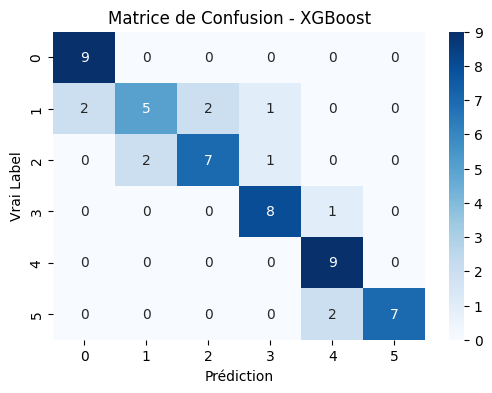


📌 Performance de Random Forest:
Accuracy: 0.7678571428571429
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.56      0.50      0.53        10
           2       0.71      0.50      0.59        10
           3       0.78      0.78      0.78         9
           4       0.75      1.00      0.86         9
           5       1.00      0.89      0.94         9

    accuracy                           0.77        56
   macro avg       0.77      0.78      0.77        56
weighted avg       0.76      0.77      0.76        56



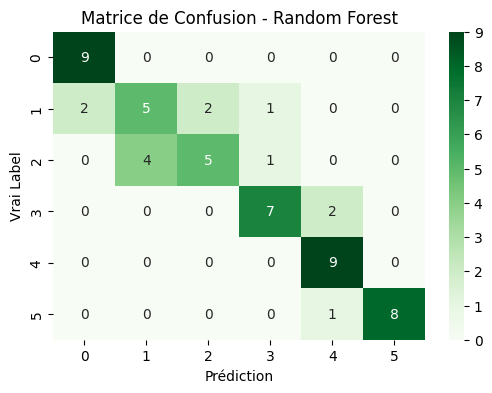

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop(columns=["Stage de l'IRC"])  # Features
y = df["Stage de l'IRC"]  # Cible

# 🔹 3. Normalisation des features numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 4. Séparer en jeu d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 5. Modèle XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# 🔹 6. Prédictions et évaluation
y_pred = xgb_model.predict(X_test)
print("📌 Performance de XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 🔹 7. Matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai Label")
plt.title("Matrice de Confusion - XGBoost")
plt.show()

# 🔹 8. Comparaison avec Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n📌 Performance de Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 🔹 9. Matrice de confusion Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Prédiction")
plt.ylabel("Vrai Label")
plt.title("Matrice de Confusion - Random Forest")
plt.show()


📌 Performance de XGBoost Amélioré:
Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.44      0.40      0.42        10
           2       0.56      0.50      0.53        10
           3       0.80      0.80      0.80        10
           4       0.69      0.90      0.78        10
           5       1.00      0.70      0.82        10

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.71        60
weighted avg       0.72      0.72      0.71        60



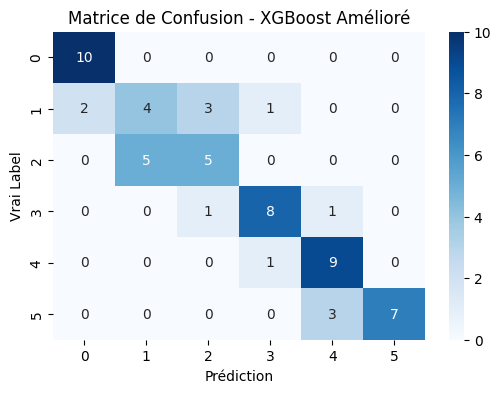

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# 🔹 2. Séparer les features et la cible
X = df.drop(columns=["Stage de l'IRC"])  # Features
y = df["Stage de l'IRC"]  # Cible

# 🔹 3. Normalisation des features numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 4. Rééquilibrage des classes avec SMOTE (si nécessaire)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 🔹 5. Séparer en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 🔹 6. Optimisation des hyperparamètres avec RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)

# 🔹 7. Meilleur modèle trouvé
best_xgb = xgb_search.best_estimator_

# 🔹 8. Prédictions et évaluation
y_pred = best_xgb.predict(X_test)
print("📌 Performance de XGBoost Amélioré:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 🔹 9. Matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai Label")
plt.title("Matrice de Confusion - XGBoost Amélioré")
plt.show()


📌 Performance de Random Forest:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.75      0.60      0.67        10
           2       0.80      0.80      0.80        10
           3       0.90      0.90      0.90        10
           4       0.77      1.00      0.87        10
           5       1.00      0.80      0.89        10

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



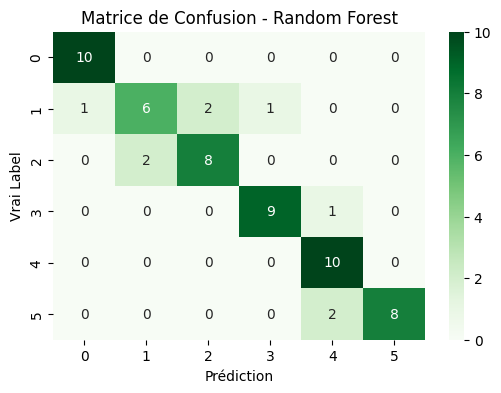

In [10]:
import matplotlib.pyplot as plt
# Entraînement d’un modèle Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print("📌 Performance de Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Prédiction")
plt.ylabel("Vrai Label")
plt.title("Matrice de Confusion - Random Forest")
plt.show()
